In [1]:
%matplotlib inline

In [2]:
import random
import time
import copy

import numpy as np
import numpy.core.defchararray as npstr
import matplotlib.pyplot as plt

# Synthetic test data generation
Deveopling convienent function that allow for control over different varibles concerning the data set will make comparing performance of the exsperimental technique more reliable and reproducable.

In [3]:
def generateWord(length):
    abc = 'abcdefghijklmnopqrstuvwxyz'
    word = ''
    for i in range(length):
        word += random.choice(abc)
    return word

def generateLengths(count,mean, dist, showGraph = False):
    s = np.random.normal(mean, dist, count)
    s = np.round(s,0).astype(int)
    lessThanOne = s < 1
    s[lessThanOne] = 1
    if showGraph:
        count, bins, ignored = plt.hist(s, 30, normed=True)
        plt.show()
    return s

def generateDictionary(count):
    currentDict = []
    wordLengths = generateLengths(count,5,1)
    for length in wordLengths:
        oldLen = len(currentDict)
        while(len(currentDict) == oldLen):
            word = generateWord(length)
            if word not in currentDict:
                currentDict.append(word)  
    return np.asarray(currentDict)

def generateComments(count,dictionary,mean,dist,showGraph = False):
    comments = []
    lengths = generateLengths(count,mean,dist,showGraph) 
    for length in lengths:
        comment = ''
        for i in range(length):
            comment += random.choice(dictionary) + ' '
        comments.append(comment.rstrip())
    return np.asarray(comments)

In [4]:

generateWord(3)

'hhr'

In [5]:
random.seed(50)
np.random.seed(12)
generateLengths(10,5,1)

array([5, 4, 5, 3, 6, 3, 5, 5, 4, 8])

In [6]:
random.seed(50)
np.random.seed(15)
dictionary = generateDictionary(20)
dictionary

array(['piluh', 'wpykc', 'rkhvr', 'celd', 'lkhgc', 'ktt', 'nucc', 'wtkz',
       'wunah', 'kiznw', 'dgoiw', 'soeit', 'grsdnv', 'twduz', 'rpnq',
       'rvepsq', 'jclyq', 'ealasvn', 'pzurzh', 'fxsde'], 
      dtype='<U7')

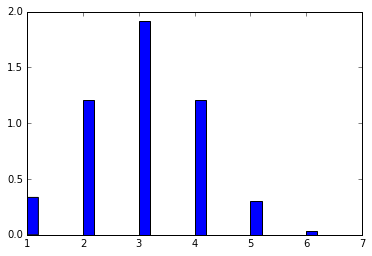

array(['wtkz rvepsq dgoiw', 'rkhvr ealasvn dgoiw', 'wtkz ealasvn',
       'rkhvr lkhgc soeit'], 
      dtype='<U47')

In [7]:
random.seed(50)
np.random.seed(15)
comments = generateComments(1000000,dictionary,3,1,True)
comments[1:5]

# Finding word pairs using string comparision

In [8]:
def findCommentsWithWords(comments,words):
    currentVocab = copy.deepcopy(comments)
    for w in words:
        currentVocab = currentVocab[(npstr.find(currentVocab, w) != -1)]
    return currentVocab

def numberOfMatches(comments, words):
    result = findCommentsWithWords(comments,words )
    #print(result)
    return len(result)
    

In [9]:
start = time.time()
print(numberOfMatches(comments, ['celd','piluh']))
end = time.time()
print(str(end - start)+' seconds')

16489
1.292099952697754 seconds


# Finding word paris using indexing by prime factorisation

### Step 1. Preprocessing
To begin we need to assign each unque word in your dictionary with a unique prime number

In [10]:
primes = np.genfromtxt ('primes.csv', delimiter=",").astype(int)
primes[1:5]

array([[1, 2],
       [2, 3],
       [3, 5],
       [4, 7]])

In [11]:
primeFit = primes[1:len(dictionary)+1,1]

In [12]:
index = dict(np.c_[dictionary,primeFit])
index['pzurzh']
index

{'celd': '7',
 'dgoiw': '31',
 'ealasvn': '61',
 'fxsde': '71',
 'grsdnv': '41',
 'jclyq': '59',
 'kiznw': '29',
 'ktt': '13',
 'lkhgc': '11',
 'nucc': '17',
 'piluh': '2',
 'pzurzh': '67',
 'rkhvr': '5',
 'rpnq': '47',
 'rvepsq': '53',
 'soeit': '37',
 'twduz': '43',
 'wpykc': '3',
 'wtkz': '19',
 'wunah': '23'}

In [61]:
def createIndexSchema(dictionary):
    primes = np.genfromtxt ('primes.csv', delimiter=",").astype(int)
    primeFit = primes[1:len(dictionary)+1,1]
    index = dict(np.c_[dictionary,primeFit])
    return index

In [90]:
def indexComments(comments,indexSchemal):
    output = []
    for comment in comments:
        prod = 1
        words = comment.split(' ')
        for word in words:
            prod *= int(indexSchemal[word])
        output.append(prod)
    return output

In [91]:
indexedComments = indexComments(comments,index)

In [92]:
def preprocessPrimeComments(dictionary,comments):
    indexSchemal = createIndexSchema(dictionary)
    indexedComments = indexComments(comments,indexSchemal)
    return [indexSchemal,indexedComments]

In [93]:
def convertWordsToProduct(indexSchema, words):
    output = 1
    for word in words:
        output *= int(indexSchema[word])
    return output

def searchByPrimeFact(indexedComments,serachProduct):
    return  (np.mod(indexedComments, serachProduct) == 0)

def findCommentsUsingPrimeFact(indexedComments,index, words):
    prod = convertWordsToProduct(index, words)
    return searchByPrimeFact(indexedComments,prod)

In [16]:
start = time.time()
print(findCommentsUsingPrimeFact(indexedComments,index,['celd','piluh']).sum())
end = time.time()
print(str(end - start)+' seconds')

16489
0.0896921157836914 seconds


# Compare Performance
The different varibles that will be tested are: 

* Number of comments x
* Number of query words x
* Length of comments x
* Dictionary length x


In [17]:
def timeFunction(func, *params):
    start = time.time()
    output = func(*params)
    end = time.time()
    return[output, (end - start)]

In [18]:
[o,t] = timeFunction(findCommentsUsingPrimeFact,indexedComments,index,['celd','piluh'])
print(o.sum(),t)

16489 0.08603191375732422


In [118]:
def generateCommentData(dictLength, numOfComments, commentLengthMean, commentLengthDist, graph = False):
    random.seed(50)
    np.random.seed(15)
    dictionary = generateDictionary(dictLength)
    comments = generateComments(numOfComments,dictionary,commentLengthMean,commentLengthDist,graph)
    return [dictionary, comments]

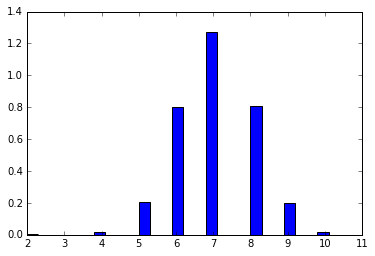

In [119]:
[d,c] = generateCommentData(300,100000,7,1, True)

In [105]:
d

array(['piluh', 'wpykc', 'rkhvr', 'celd', 'lkhgc', 'ktt', 'nucc', 'wtkz',
       'wunah', 'kiznw', 'dgoiw', 'soeit', 'grsdnv', 'twduz', 'rpnq',
       'rvepsq', 'jclyq', 'ealasvn', 'pzurzh', 'fxsde', 'imzhk', 'buqb',
       'cuhvi', 'qnos', 'nympc', 'mdl', 'byya', 'covusa', 'jklruv',
       'qpcjfn', 'gdv', 'cafe', 'beaj', 'vxl', 'afqbh', 'swjws', 'aepmn',
       'lreha', 'qtju', 'kmkberp', 'jezdkm', 'wziq', 'rddrca', 'djup',
       'oijzv', 'thzihs', 'vghj', 'hbrpf', 'hdwix', 'myaxjrd', 'zfvnhpm',
       'yrbqj', 'pdffykq', 'gahg', 'zpjwv', 'ouurrd', 'gblag', 'chedw',
       'odixp', 'gflmtb', 'dcylm', 'tabm', 'ptkny', 'dqpo', 'houwrq',
       'dzx', 'dhve', 'rapjzj', 'qvsmx', 'rtmqese', 'bqgmm', 'ik',
       'vlkjlj', 'pedcx', 'vrzrk', 'runn', 'prang', 'eusyzj', 'oukbk',
       'hfhql', 'ayvlhd', 'qmxvn', 'kqvt', 'kojou', 'ugfsnw', 'myoywki',
       'lsnub', 'nkvh', 'dbrltu', 'xvoblu', 'rpfi', 'npig', 'ajttcvk',
       'cxl', 'ylbl', 'caocs', 'jmwd', 'vwepv', 'nfrqe', 'hjawb', 'inyn'

In [106]:
c[1:10]

array(['tkrt rkhvr nptm runn tabm chedw qpcjfn gahg',
       'oijzv oijzv ezdi zokmvm bysfx ennoc',
       'odixp awjqt ngkajj dzx hsoe grsdnv piqgh rpjns',
       'zjpleh qcprx ztninb masdnf uaqaj yerlz rapjzj',
       'kqvt djup hbrpf lhnnh snoxm wllh rpjns',
       'monbcr sotpmht ezdi oqwtdz tkrt zjpleh',
       'srti rrlpj uswhx kffc sozc hbrpf',
       'sswgqn gflmtb hsoe uaqaj sifsr gblag dcylm',
       'ccxgzn xvoblu nulgr dzx wzf lkhgc jkbzk oqwtdz'], 
      dtype='<U71')

In [107]:
def pickRandomWordsFromDict(dictionary, minLength, maxLength, count):
    output = []
    for word in dictionary:
        if maxLength >= len(word) >= minLength:
            output.append(word)
            if len(output)==count:
                return output
    return ValueError('Dictionary did not conatin enough word of your min length')
    

In [108]:
wordsToserachFor = pickRandomWordsFromDict(d,3,7,3)
wordsToserachFor

['piluh', 'wpykc', 'rkhvr']

In [109]:
[o,t] = timeFunction(numberOfMatches, c, wordsToserachFor)

In [110]:
t

0.1272280216217041

In [111]:
d

array(['piluh', 'wpykc', 'rkhvr', 'celd', 'lkhgc', 'ktt', 'nucc', 'wtkz',
       'wunah', 'kiznw', 'dgoiw', 'soeit', 'grsdnv', 'twduz', 'rpnq',
       'rvepsq', 'jclyq', 'ealasvn', 'pzurzh', 'fxsde', 'imzhk', 'buqb',
       'cuhvi', 'qnos', 'nympc', 'mdl', 'byya', 'covusa', 'jklruv',
       'qpcjfn', 'gdv', 'cafe', 'beaj', 'vxl', 'afqbh', 'swjws', 'aepmn',
       'lreha', 'qtju', 'kmkberp', 'jezdkm', 'wziq', 'rddrca', 'djup',
       'oijzv', 'thzihs', 'vghj', 'hbrpf', 'hdwix', 'myaxjrd', 'zfvnhpm',
       'yrbqj', 'pdffykq', 'gahg', 'zpjwv', 'ouurrd', 'gblag', 'chedw',
       'odixp', 'gflmtb', 'dcylm', 'tabm', 'ptkny', 'dqpo', 'houwrq',
       'dzx', 'dhve', 'rapjzj', 'qvsmx', 'rtmqese', 'bqgmm', 'ik',
       'vlkjlj', 'pedcx', 'vrzrk', 'runn', 'prang', 'eusyzj', 'oukbk',
       'hfhql', 'ayvlhd', 'qmxvn', 'kqvt', 'kojou', 'ugfsnw', 'myoywki',
       'lsnub', 'nkvh', 'dbrltu', 'xvoblu', 'rpfi', 'npig', 'ajttcvk',
       'cxl', 'ylbl', 'caocs', 'jmwd', 'vwepv', 'nfrqe', 'hjawb', 'inyn'

In [112]:
[indx,indxCom] = preprocessPrimeComments(d,c)

In [113]:
indx

{'aaku': '1733',
 'abcqz': '1039',
 'abdx': '1811',
 'aepmn': '157',
 'afqbh': '149',
 'afwyh': '563',
 'ajttcvk': '487',
 'akstbrc': '1433',
 'auovd': '1907',
 'awdp': '1889',
 'awfiu': '1823',
 'awjqt': '1543',
 'axwcr': '641',
 'ayvlhd': '419',
 'bbhzdj': '769',
 'bcu': '1087',
 'beaj': '137',
 'bgtu': '1109',
 'biop': '839',
 'bqgmm': '353',
 'buqb': '79',
 'bxenrn': '1013',
 'bysfx': '1493',
 'byya': '103',
 'cafe': '131',
 'caocs': '503',
 'ccxgzn': '1193',
 'cdrk': '1201',
 'celd': '7',
 'chedw': '271',
 'cjjlo': '1459',
 'cnotj': '907',
 'covusa': '107',
 'cpnzeg': '1117',
 'cqke': '1231',
 'ctnzfth': '911',
 'cuhvi': '83',
 'cwpgp': '773',
 'cxl': '491',
 'dbrltu': '461',
 'dcylm': '283',
 'deyno': '1229',
 'dgoiw': '31',
 'dhve': '331',
 'djakv': '1867',
 'djup': '193',
 'dlora': '1381',
 'dlpff': '619',
 'dnowzxn': '1861',
 'dpwdv': '709',
 'dqpo': '311',
 'dsrvb': '1373',
 'dtny': '1759',
 'dxdmws': '809',
 'dydbnoz': '1327',
 'dzx': '317',
 'ealasvn': '61',
 'ebrwzy': '739

# Performance against number of comments to search

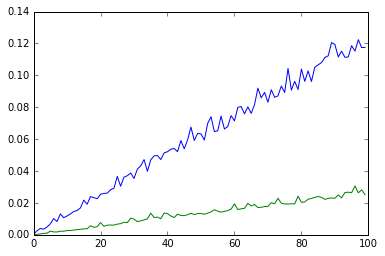

In [114]:
stringCompTimings = []
primeTimings = []
for n in range(100,100000,1000):
    [o,t] = timeFunction(numberOfMatches, c[:n], wordsToserachFor)
    stringCompTimings.append(t)
    
    [o,t] = timeFunction(findCommentsUsingPrimeFact, indxCom[:n],indx, wordsToserachFor)
    primeTimings.append(t)
plt.figure()
plt.plot(stringCompTimings)
plt.plot(primeTimings)
plt.show()

# Performance against number of words searched for

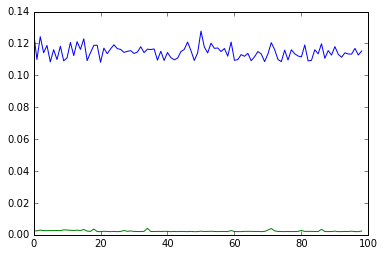

In [117]:
stringCompTimings = []
primeTimings = []
for n in range(1,100):
    randWords = pickRandomWordsFromDict(d,2,7,n)
    [o,t] = timeFunction(numberOfMatches, c[:100000], randWords)
    stringCompTimings.append(t)
    
    [o,t] = timeFunction(findCommentsUsingPrimeFact, indxCom[:10000],indx, randWords)
    primeTimings.append(t)
plt.figure()
plt.plot(stringCompTimings)
plt.plot(primeTimings)
plt.show()

# Performance against length of comments to serach through

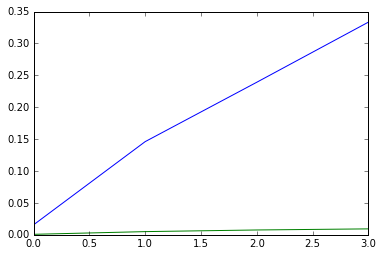

In [123]:
stringCompTimings = []
primeTimings = []
for n in range(5,400,100):
    [dl,cl] = generateCommentData(30,10000,n,1)
    randWords = pickRandomWordsFromDict(dl,2,7,4)
    
    [o,t] = timeFunction(numberOfMatches, cl, randWords)
    stringCompTimings.append(t)
    
    [indexSchemal, indxComl] = preprocessPrimeComments(dl,cl)
    [o,t] = timeFunction(findCommentsUsingPrimeFact, indxComl,indexSchemal, randWords)
    primeTimings.append(t)
plt.figure()
plt.plot(stringCompTimings)
plt.plot(primeTimings)
plt.show()

In [131]:
d = list(map(lambda a,b:a/b,stringCompTimings,primeTimings))
d

[20.725552050473187, 29.26459069634158, 31.59192669794389, 35.90168395112435]

In [125]:
primeTimings

[0.0007557868957519531,
 0.004992008209228516,
 0.0075719356536865234,
 0.009287834167480469]

# Performance against length of dictionary

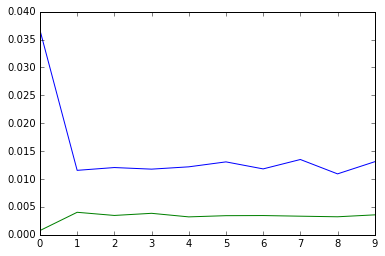

In [133]:
stringCompTimings = []
primeTimings = []
for n in range(5,1000,100):
    [dl,cl] = generateCommentData(n,10000,10,1)
    randWords = pickRandomWordsFromDict(dl,2,7,4)
    
    [o,t] = timeFunction(numberOfMatches, cl, randWords)
    stringCompTimings.append(t)
    
    [indexSchemal, indxComl] = preprocessPrimeComments(dl,cl)
    [o,t] = timeFunction(findCommentsUsingPrimeFact, indxComl,indexSchemal, randWords)
    primeTimings.append(t)
plt.figure()
plt.plot(stringCompTimings)
plt.plot(primeTimings)
plt.show()